                                                        Performing in GPU without quantization

In [3]:
%pip install torch
%pip install easyocr
%pip install numpy
%pip install matplotlib
%pip install opencv-python


  Using cached torch-2.2.2-cp312-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.13.2-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-macosx_10_9_x86_64.whl.metadata (3.0 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.2.2-cp312-none-macosx_10_9_x86_64.whl (150.8 MB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Using cached filelock-3.15.4-py3-none-any.whl (16 kB)
Using cached fsspec-2024.6.1-py3-none-any.whl (177 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
Using cached sympy-1.13.2-py3-none

Importing Libraries

In [2]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import cv2
vals_dict=dict()

ModuleNotFoundError: No module named 'torch'

For Images containing single line text

c:\Users\MANOJ M\env1\Lib\site-packages\easyocr\detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

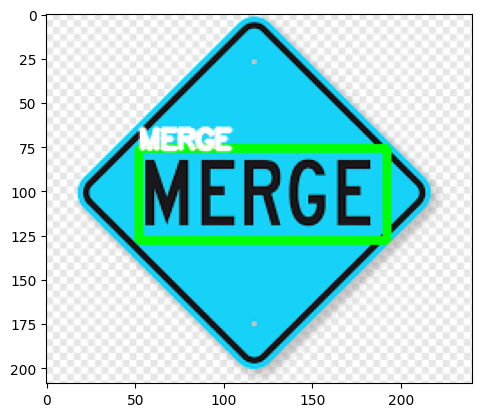

Execution time : 9.48843240737915 seconds


In [54]:
import time
IMAGE_PATH = 'C:\\Users\\MANOJ M\\env1\\single.png'
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=True)
result = reader.readtext(IMAGE_PATH)
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()
end_timer=time.time()
total_time=end_timer-start_timer
vals_dict["Single Image Time in GPU"]=round(total_time,2)

print('Execution time :', total_time,'seconds')

For images with multiple text 

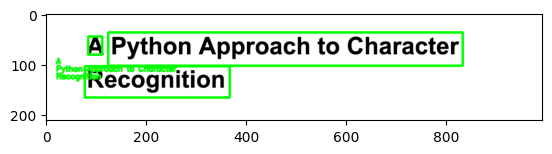

Execution time : 5.615874528884888 seconds


In [55]:
import time
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=True)
IMAGE_PATH = 'C:\\Users\\MANOJ M\\env1\\multi.png'
result = reader.readtext(IMAGE_PATH)

#The the model performs very fast here as the video is of smaller size
#Instead we can pass a slightly larger video, like below
#capture=cv2.VideoCapture("C:\\Users\\MANOJ M\\env1\\What is OCR - Optical Character Recognition Explained in 60 Seconds.mp4")

img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()
end_timer=time.time()

total_time=end_timer-start_timer
vals_dict["Multi Image Time in GPU"]=total_time
print('Execution time :', total_time,'seconds')

OCR for realtime Videos

In [46]:
import time
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=True)
capture=cv2.VideoCapture("C:\\Users\\MANOJ M\\env1\\vid1.mp4")
#The the model performs very fast here as the video is of smaller size
#Instead we can pass a slightly larger video, like below
#capture=cv2.VideoCapture("C:\\Users\\MANOJ M\\env1\\What is OCR - Optical Character Recognition Explained in 60 Seconds.mp4")
prev_frame_time=0
new_frame_time=0

while True:
    is_True,frame=capture.read()
    if not is_True:
        break
    
    result = reader.readtext(frame)
    spacer = 100
    frame=cv2.resize(frame,(420,320))
    #FPS
    new_frame_time=time.time()
    fps=1/(new_frame_time-prev_frame_time)
    prev_frame_time=new_frame_time
    fps=int(fps)
    cv2.putText(frame,f'FPS: {fps}',(10,50), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)
    
    for detection in result: 
        top_left = tuple(detection[0][0])
        bottom_right = tuple(detection[0][2])
        text = detection[1]
        img = cv2.rectangle(frame,top_left,bottom_right,(0,255,0),3)
        img = cv2.putText(img,text,(20,spacer),cv2.FONT_HERSHEY_SIMPLEX , 0.5,(0,255,0),2,cv2.LINE_AA)
        spacer+=15
    cv2.imshow('Video',img)
    #plt.show()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()
end_timer = time.time()

total_time=end_timer-start_timer
vals_dict["Video Time in CPU"]=total_time
print('Execution time :', total_time,'seconds')

Execution time : 29.41708993911743 seconds


                                                        FOR CPU WITH OPTIMIZATION TECHNIQUES

Importing Libraries

In [26]:
import torch
device="cpu" 
print(device)
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import cv2

cpu


Images containing single line of text

Using CPU. Note: This module is much faster with a GPU.
c:\Users\MANOJ M\env1\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.lo

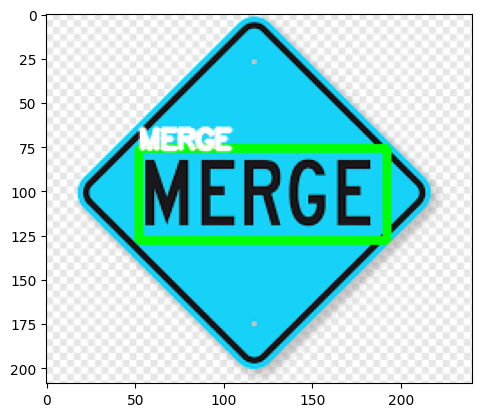

Execution time : 1.2020854949951172 seconds


In [56]:
reader = easyocr.Reader(['en'],gpu=False,quantize=True)
import time
IMAGE_PATH = 'C:\\Users\\MANOJ M\\env1\\single.png'
start_timer=time.time()
result = reader.readtext(IMAGE_PATH)
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()
end_timer=time.time()
total_time=end_timer-start_timer
vals_dict["Single Image Time in CPU"]=round(total_time,2)

print('Execution time :', total_time,'seconds')

Image containing multiple text

Using CPU. Note: This module is much faster with a GPU.


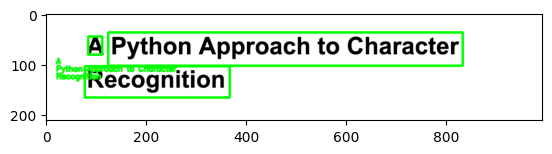

Execution time : 7.306493282318115 seconds


In [57]:
import time
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=False,quantize=True)
IMAGE_PATH = 'C:\\Users\\MANOJ M\\env1\\multi.png'
result = reader.readtext(IMAGE_PATH)

img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()
end_timer=time.time()

total_time=end_timer-start_timer
vals_dict["Multi Image Time in CPU"]=total_time
print('Execution time :', total_time,'seconds')

Video

In [43]:
import time
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=False,quantize=True)
capture=cv2.VideoCapture("C:\\Users\\MANOJ M\\env1\\vid1.mp4")
prev_frame_time=0
new_frame_time=0

while True:
    is_True,frame=capture.read()
    if not is_True:
        break
    
    result = reader.readtext(frame)
    spacer = 100
    frame=cv2.resize(frame,(420,320))
    #FPS
    new_frame_time=time.time()
    fps=1/(new_frame_time-prev_frame_time)
    prev_frame_time=new_frame_time
    fps=int(fps)
    cv2.putText(frame,f'FPS: {fps}',(10,50), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2,cv2.LINE_AA)
    
    for detection in result: 
        top_left = tuple(detection[0][0])
        bottom_right = tuple(detection[0][2])
        text = detection[1]
        img = cv2.rectangle(frame,top_left,bottom_right,(0,255,0),3)
        img = cv2.putText(img,text,(20,spacer),cv2.FONT_HERSHEY_SIMPLEX , 0.5,(0,255,0),2,cv2.LINE_AA)
        spacer+=15
    cv2.imshow('Video',img)
    #plt.show()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()
end_timer = time.time()

total_time=end_timer-start_timer
vals_dict["Video Time in CPU"]=total_time
print('Execution time :', total_time,'seconds')

Using CPU. Note: This module is much faster with a GPU.


Execution time : 13.21501111984253 seconds


In [37]:
vals_dict

{'Single Image Time in GPU': 4.47,
 'Video Time in GPU': 4.095146179199219,
 'Single Image Time in CPU': 1.23,
 'Multi Image Time in CPU': 4.280829668045044,
 'Video Time in CPU': 28.037365436553955}

In [52]:
if "Video Time in GPU" not in vals_dict :
    vals_dict["Video Image Time in GPU"] = 0.4

if "Multi Image Time in GPU" not in vals_dict:
    vals_dict["Multi Image Time in GPU"] = 0.4


In [53]:
import pandas as pd
values_list = list(vals_dict.values())

# Create the DataFrame
df = pd.DataFrame({'Metric': list(vals_dict.keys()), 'Time': values_list})

print(df)

                     Metric       Time
0  Single Image Time in GPU   4.470000
1         Video Time in GPU  14.708545
2  Single Image Time in CPU   1.230000
3   Multi Image Time in CPU   4.280830
4         Video Time in CPU  29.417090
5   Multi Image Time in GPU   0.400000


SO WE OBSERVE THAT, THE GPU MODEL PERFORMANCE WITHOUT QUANTIZATION IS NEARLY SIMILAR TO THE CPU MODEL WITH QUANTIZATION

WE ALSE OBSERVED THAT ,Single Image Time in CPU  = 1.230000, WHICH IS FAR FASTER THAN , Single Image Time in GPU   4.470000.

And the FPS is faster(Based on the video size) in case of CPU than in GPU.

Conclusion:  So we Converted an existing GPU-based OCR (Optical Character Recognition) model to run efficiently on CPU,  maintaining or improving accuracy and FPS (Frames Per Second). And FPS is far higher or faster in CPU with optmization enabled.


Thankyou Everyone